In [1]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")

In [2]:
# importing the dataset
df = pd.read_csv('internet_service_churn.csv')
df.head() # see the top 5 rows of the dataset

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [3]:
# First I'll take care of the missing values
# check the missing vlaue
df.isnull().mean()

id                             0.000000
is_tv_subscriber               0.000000
is_movie_package_subscriber    0.000000
subscription_age               0.000000
bill_avg                       0.000000
reamining_contract             0.298475
service_failure_count          0.000000
download_avg                   0.005272
upload_avg                     0.005272
download_over_limit            0.000000
churn                          0.000000
dtype: float64

In [4]:
# Taking care of "reamining_contract"
df['reamining_contract'] = df['reamining_contract'].fillna(df['reamining_contract'].median())

In [5]:
# For the rest two fetures I'll use mean to impute them.
df['download_avg'] = df['download_avg'].fillna(df['download_avg'].mean())
df['upload_avg'] = df['upload_avg'].fillna(df['upload_avg'].mean())

<AxesSubplot:>

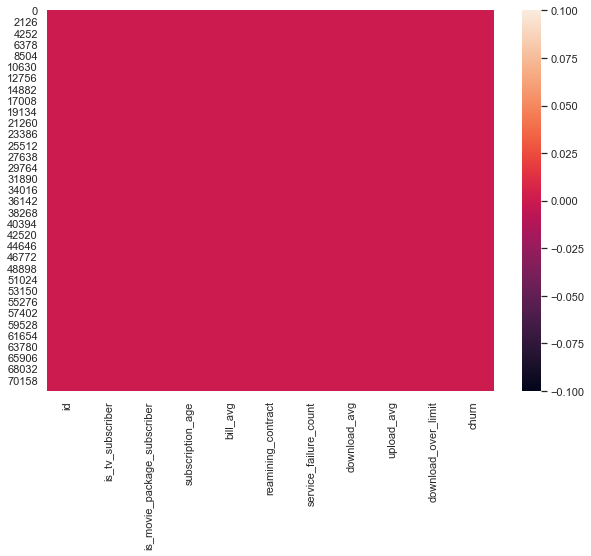

In [9]:
# Now let's check it visually if is there any missing value or not
plt.figure(figsize = (10,7))
sns.heatmap(df.isnull())

Removing all NaN values from the dataset we got a complete dataset. 

Now let's remove id column which is not requried for this task

In [10]:
# removing id column
df.drop('id', axis = 1, inplace = True)

Since we will perform some classifier algorithm for this project and most of those algorithm use Euclidean distance and for this reason we don't need to scale the features. With that our Feature engineering part ends. In the next lecture I'll show you how to select feature and perform machine learning. Before doing that let's save the cleaned dataset for further use.

In [11]:
# saving the cleaned data
df.to_csv('final_data.csv')